# Heart Failure Prediction

## Required Libraries

In [52]:
import numpy
import pandas as pd
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Importing Dataset

In [2]:
dataset=pd.read_csv('heart_failure_clinical_records_dataset.csv')
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Dataset Shape

In [3]:
print(dataset.shape)

(299, 13)


# Data Types

In [4]:
set_option('display.max_rows', 500)
print(dataset.dtypes)


age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


# Dataset at a Glance

In [5]:
set_option('display.width', 100)
print(dataset.head(20))


     age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  high_blood_pressure  \
0   75.0        0                       582         0                 20                    1   
1   55.0        0                      7861         0                 38                    0   
2   65.0        0                       146         0                 20                    0   
3   50.0        1                       111         0                 20                    0   
4   65.0        1                       160         1                 20                    0   
5   90.0        1                        47         0                 40                    1   
6   75.0        1                       246         0                 15                    0   
7   60.0        1                       315         1                 60                    0   
8   65.0        0                       157         0                 65                    0   
9   80.0        1             

# Statistical View

In [6]:
set_option('precision', 3)
print(dataset.describe())


           age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
count  299.000  299.000                   299.000   299.000            299.000   
mean    60.834    0.431                   581.839     0.418             38.084   
std     11.895    0.496                   970.288     0.494             11.835   
min     40.000    0.000                    23.000     0.000             14.000   
25%     51.000    0.000                   116.500     0.000             30.000   
50%     60.000    0.000                   250.000     0.000             38.000   
75%     70.000    1.000                   582.000     1.000             45.000   
max     95.000    1.000                  7861.000     1.000             80.000   

       high_blood_pressure   platelets  serum_creatinine  serum_sodium      sex  smoking     time  \
count              299.000     299.000           299.000       299.000  299.000  299.000  299.000   
mean                 0.351  263358.029             1.394   

# Data Visualization

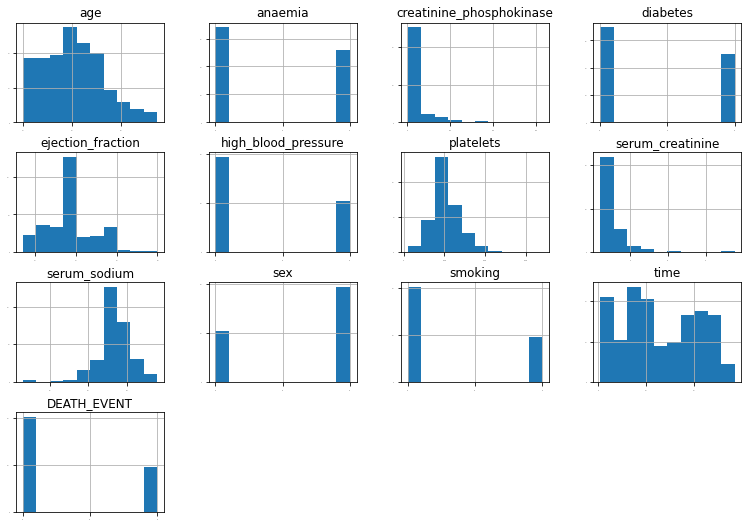

In [8]:
#pyplot.figure(figsize=(14, 9))
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1,figsize=(13, 9))
pyplot.show()

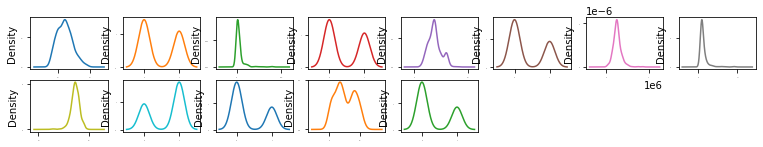

In [9]:
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False,
fontsize=1,figsize=(13, 9))
pyplot.show()

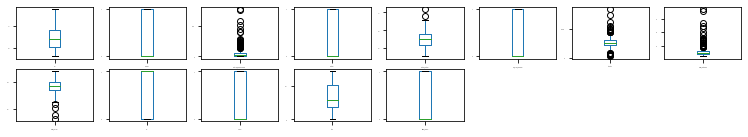

In [10]:
dataset.plot(kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False,
fontsize=1,figsize=(13, 9))
pyplot.show()


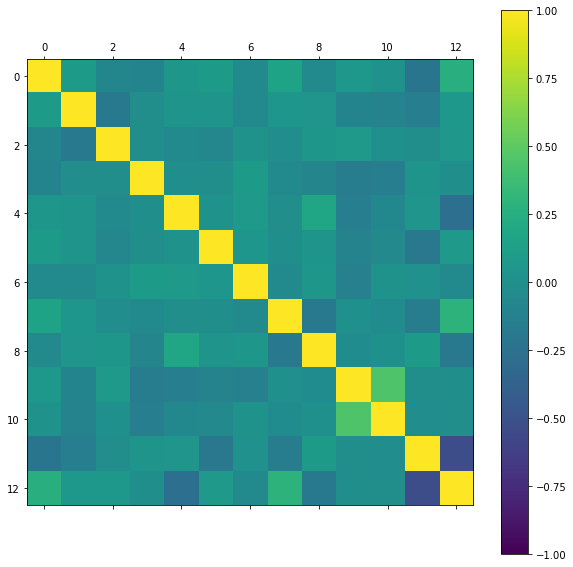

In [11]:
#pyplot.figure(figsize=(14, 9))
fig = pyplot.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()


## Feature Selection

In [60]:
#array = dataset.values
X = dataset.drop(columns=['DEATH_EVENT'])
Y = dataset["DEATH_EVENT"]

In [62]:
rf=RandomForestClassifier()
 
rf.fit(X,Y)
rf.feature_importances_

array([0.09271008, 0.01369991, 0.08302641, 0.01237474, 0.11250436,
       0.01219695, 0.07994669, 0.14568132, 0.06914175, 0.01243236,
       0.01181278, 0.35447265])

Text(0.5, 0, 'Random Forest Feature Importance')

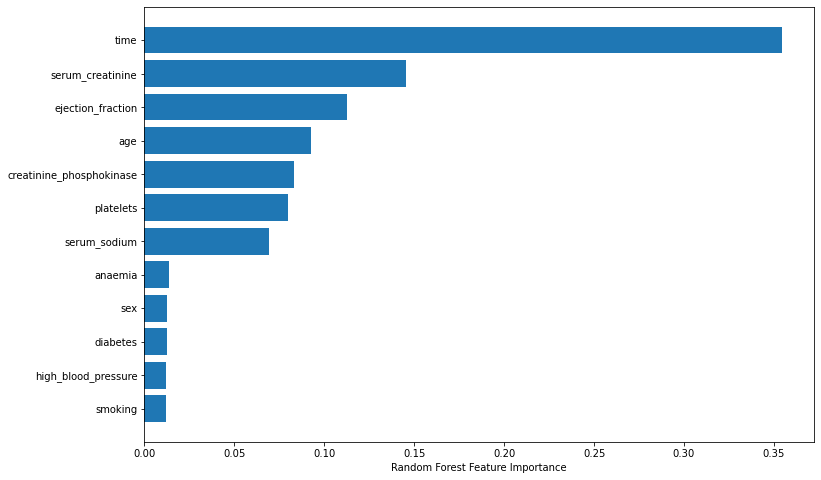

In [63]:
plt.figure(figsize=(12, 8))
sorted_idx = rf.feature_importances_.argsort()
plt.barh(dataset.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [64]:
X = X.drop(columns=["smoking","high_blood_pressure","diabetes"])
X.head()

,age,anaemia,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,sex,time
0,75.0,0,582,20,265000.00,1.9,130,1,4
1,55.0,0,7861,38,263358.03,1.1,136,1,6
2,65.0,0,146,20,162000.00,1.3,129,1,7
3,50.0,1,111,20,210000.00,1.9,137,1,7
4,65.0,1,160,20,327000.00,2.7,116,0,8


# Split the Dataset

In [65]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)
num_folds = 10
seed = 7
scoring = 'accuracy'

# Spot-Check Algorithms

In [72]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=100)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [86]:
results = []
names = []
for name, model in models:
    model.fit(X_train,Y_train)
    lprediction=model.predict(X_validation)
    result = confusion_matrix(Y_validation, lprediction)
    print("                                                                                                            ")
    print("`````````````````````````````````````````````````````````````````````````````````````````````")
    print("Algorithnm :",model)
    print("`````````````````````````````````````````````````````````````````````````````````````````````")
    print("Confusion Matrix:")
    print(result)
    result1 = classification_report(Y_validation, lprediction)
    print("Classification Report:",)
    print (lresult1)
    result2 = accuracy_score(Y_validation,lprediction)
    print ('R Squared =',r2_score(Y_validation, lprediction))
    print ('MAE       =',mean_absolute_error(Y_validation, lprediction))
    print ('MSE       =',mean_squared_error(Y_validation, lprediction))
    print("Accuracy:  ",result2*100,"%")
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

                                                                                                            
`````````````````````````````````````````````````````````````````````````````````````````````
Algorithnm : LogisticRegression()
`````````````````````````````````````````````````````````````````````````````````````````````
Confusion Matrix:
[[40  6]
 [ 5  9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        46
           1       0.00      0.00      0.00        14

    accuracy                           0.77        60
   macro avg       0.38      0.50      0.43        60
weighted avg       0.59      0.77      0.67        60

R Squared = -0.02484472049689468
MAE       = 0.18333333333333332
MSE       = 0.18333333333333332
Accuracy:   81.66666666666667 %
LR: 0.787500 (0.080039)
                                                                                                            
````````````````````

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

                                                                                                            
`````````````````````````````````````````````````````````````````````````````````````````````
Algorithnm : KNeighborsClassifier(n_neighbors=100)
`````````````````````````````````````````````````````````````````````````````````````````````
Confusion Matrix:
[[46  0]
 [14  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        46
           1       0.00      0.00      0.00        14

    accuracy                           0.77        60
   macro avg       0.38      0.50      0.43        60
weighted avg       0.59      0.77      0.67        60

R Squared = -0.30434782608695676
MAE       = 0.23333333333333334
MSE       = 0.23333333333333334
Accuracy:   76.66666666666667 %
KNN: 0.656884 (0.080762)
                                                                                                            
``

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model Evaluation in Loop

In [87]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

LR: 0.787500 (0.080039)
LDA: 0.829167 (0.090235)
KNN: 0.656884 (0.080762)
CART: 0.749457 (0.096134)
NB: 0.799819 (0.086674)
SVM: 0.656884 (0.080762)


# Compare Algos

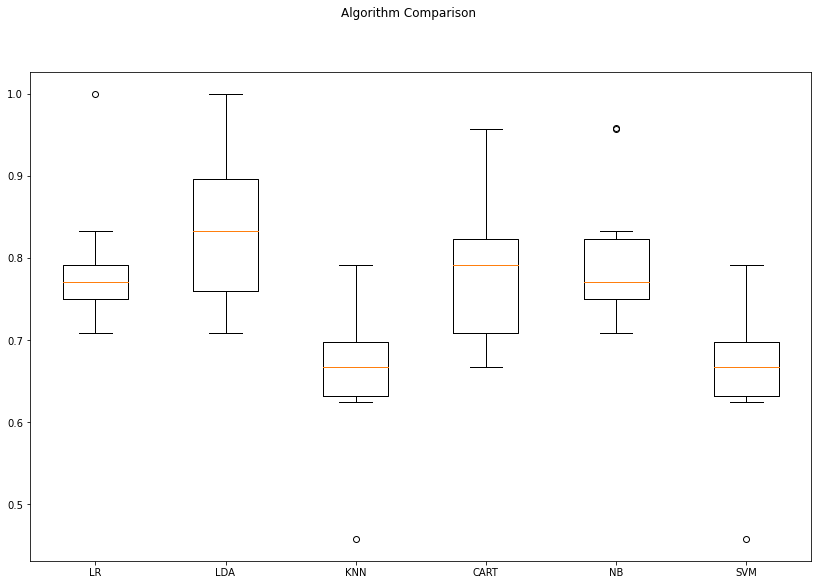

In [82]:
fig = pyplot.figure(figsize=(14, 9))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Standardize the Dataset

In [83]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
    LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
    LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
    KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
    DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
    GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    #print(cv_results.mean())
    #print(f"Algo Name :{name}, Cross val Score :{cv_results.mean()}, Cross Val Std :{cv_results.std()}")

ScaledLR: 0.829167 (0.082180)
ScaledLDA: 0.829167 (0.090235)
ScaledKNN: 0.744928 (0.093601)
ScaledCART: 0.757790 (0.088275)
ScaledNB: 0.741123 (0.107675)
ScaledSVM: 0.791667 (0.111803)


# Compare Algorithms

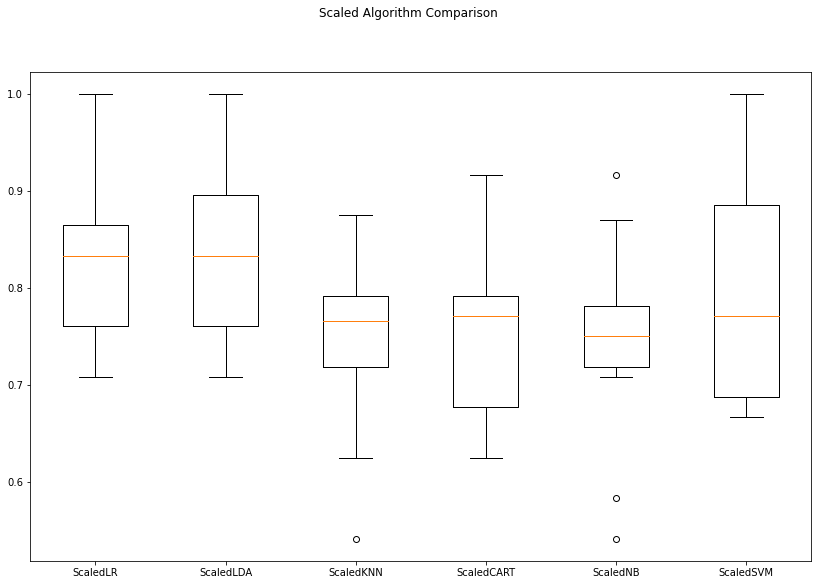

In [85]:
# Compare Algorithms
fig = pyplot.figure(figsize=(14, 9))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Tuning KNN

In [23]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.740761 using {'n_neighbors': 11}
0.619203 (0.077906) with: {'n_neighbors': 1}
0.669565 (0.085833) with: {'n_neighbors': 3}
0.698913 (0.092266) with: {'n_neighbors': 5}
0.682428 (0.096206) with: {'n_neighbors': 7}
0.711775 (0.111740) with: {'n_neighbors': 9}
0.740761 (0.078086) with: {'n_neighbors': 11}
0.728623 (0.084986) with: {'n_neighbors': 13}
0.736957 (0.088638) with: {'n_neighbors': 15}
0.732790 (0.084910) with: {'n_neighbors': 17}
0.736775 (0.082630) with: {'n_neighbors': 19}
0.736775 (0.086730) with: {'n_neighbors': 21}


# Tuning SVM

In [24]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.841486 using {'C': 2.0, 'kernel': 'sigmoid'}
0.791304 (0.096362) with: {'C': 0.1, 'kernel': 'linear'}
0.669565 (0.083786) with: {'C': 0.1, 'kernel': 'poly'}
0.656884 (0.080762) with: {'C': 0.1, 'kernel': 'rbf'}
0.698913 (0.080186) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.791304 (0.090796) with: {'C': 0.3, 'kernel': 'linear'}
0.686232 (0.074860) with: {'C': 0.3, 'kernel': 'poly'}
0.732428 (0.093015) with: {'C': 0.3, 'kernel': 'rbf'}
0.799819 (0.111236) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.791304 (0.090796) with: {'C': 0.5, 'kernel': 'linear'}
0.724094 (0.106838) with: {'C': 0.5, 'kernel': 'poly'}
0.745471 (0.100514) with: {'C': 0.5, 'kernel': 'rbf'}
0.799819 (0.088654) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.782971 (0.088438) with: {'C': 0.7, 'kernel': 'linear'}
0.741123 (0.109275) with: {'C': 0.7, 'kernel': 'poly'}
0.762138 (0.101605) with: {'C': 0.7, 'kernel': 'rbf'}
0.795471 (0.081652) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.782971 (0.088438) with: {'C': 0.9, 'kernel': 'lin

In [25]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.783333 (0.090906)
GBM: 0.770471 (0.072046)
RF: 0.828986 (0.077540)
ET: 0.791486 (0.098296)


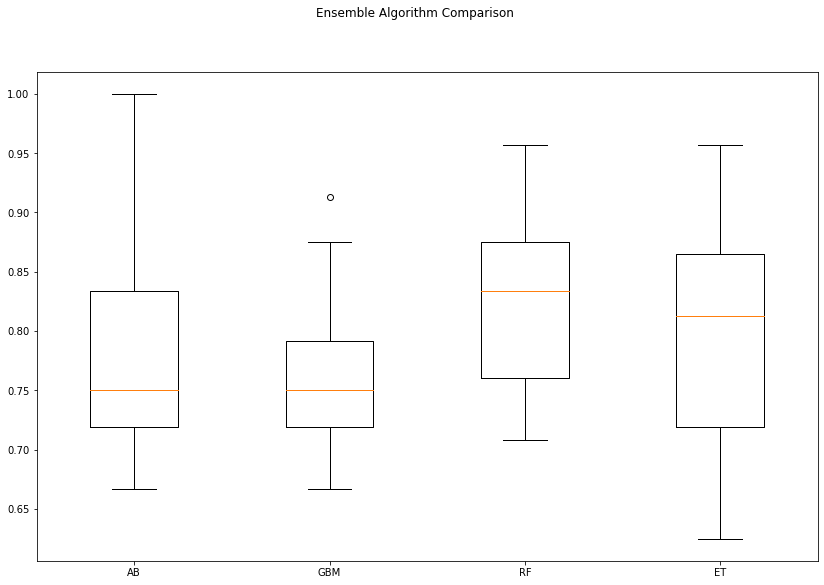

In [26]:
# Compare Algorithms
fig = pyplot.figure(figsize=(14, 9))
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [47]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
#model = KNeighborsClassifier(n_neighbors=9)
model= SVC()
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print("Accuracy :",accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy : 0.9166666666666666
[[45  1]
 [ 4 10]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95        46
         1.0       0.91      0.71      0.80        14

    accuracy                           0.92        60
   macro avg       0.91      0.85      0.87        60
weighted avg       0.92      0.92      0.91        60

